# 과제 1. 사용자 입력(또는 직접 지정)으로 도형 그리기
- Colab에서는 `input()` 사용이 다소 번거로울 수 있으므로, 예시에서는 변수를 직접 지정하여 시연.
- 이 예제에서는 **직선**을 그립니다. 다른 도형(사각형, 원 등)에도 같은 방식으로 적용 가능합니다.

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Helper function: display image using Matplotlib
def show_image(title, img):
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6,6))
    plt.imshow(rgb_img)
    plt.title(title)
    plt.axis('off')
    plt.show()

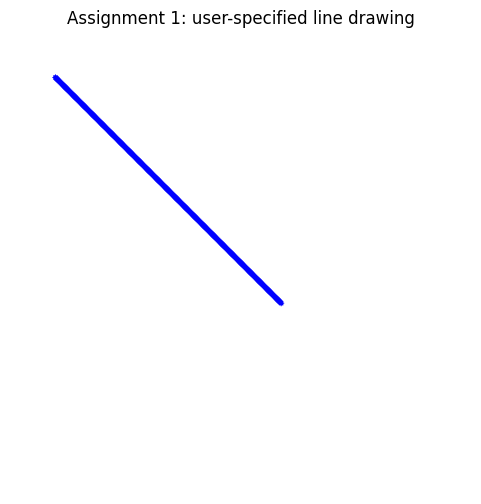

In [8]:
# (Assignment 1) Instead of user input, we directly specify values here.
image_1 = np.full((512, 512, 3), 255, np.uint8)

# Example: line information
start_point = (50, 50)   # (x, y)
end_point = (300, 300)  # (x, y)
color = (255, 0, 0)      # BGR (blue)
thickness = 5            # thickness

cv2.line(image_1, start_point, end_point, color, thickness)
show_image("Assignment 1: user-specified line drawing", image_1)

# 과제 2. 애니메이션 효과
- Colab 환경에서는 매 프레임을 실시간으로 띄우는 것이 까다로우므로, **반복문**을 돌려 여러 이미지를 연속 생성한 뒤 Matplotlib으로 순차적으로 표시하거나
- 또는 이미지를 파일로 저장하여 GIF로 만들 수도 있습니다.
- 예시: 원의 중심(혹은 반지름)을 조금씩 변경하면서 애니메이션 형태로 그림.


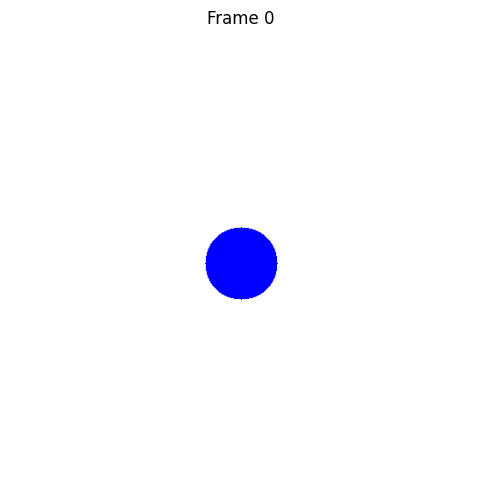

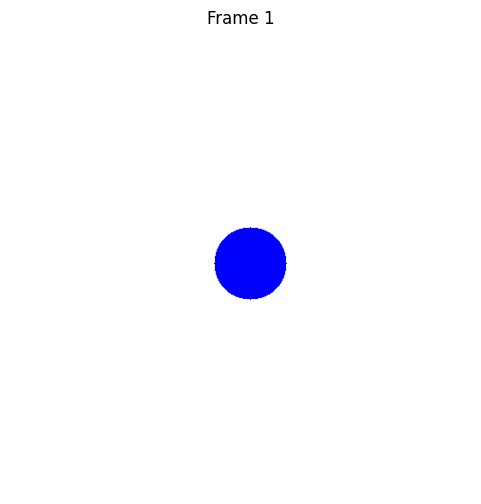

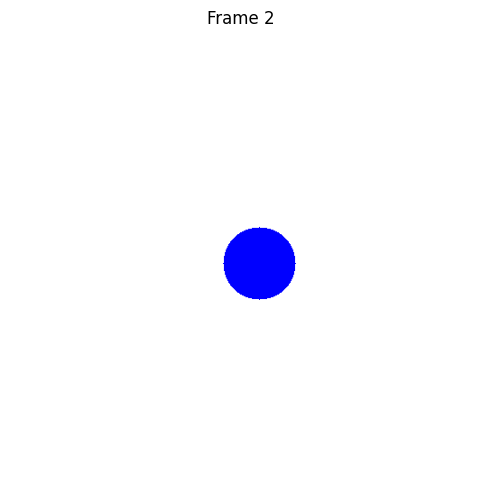

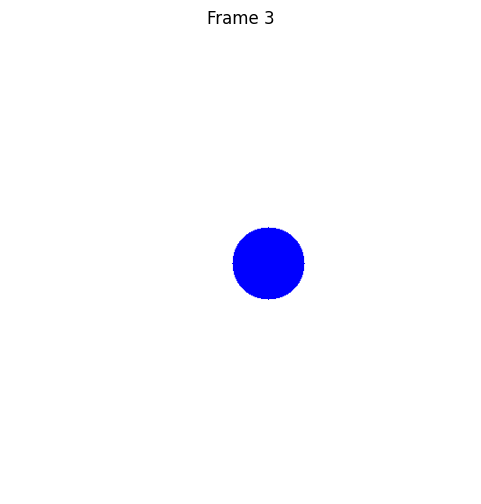

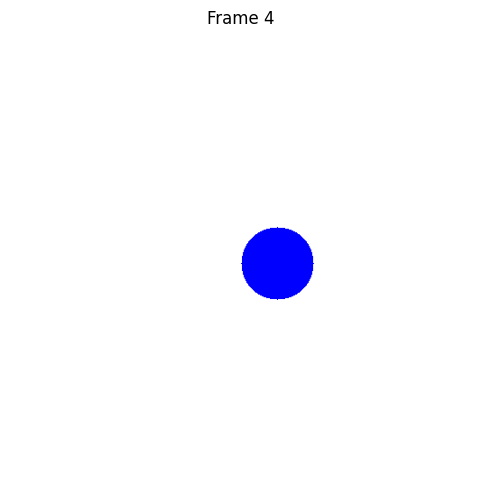

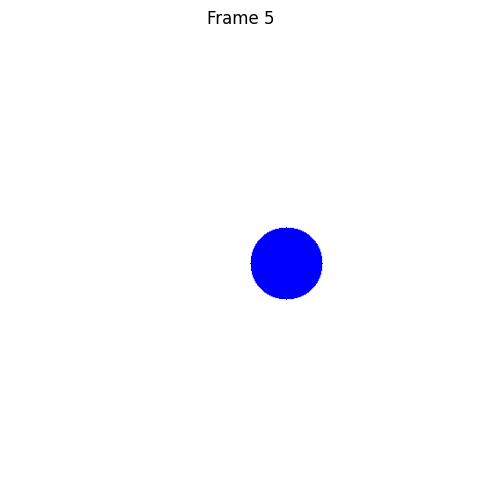

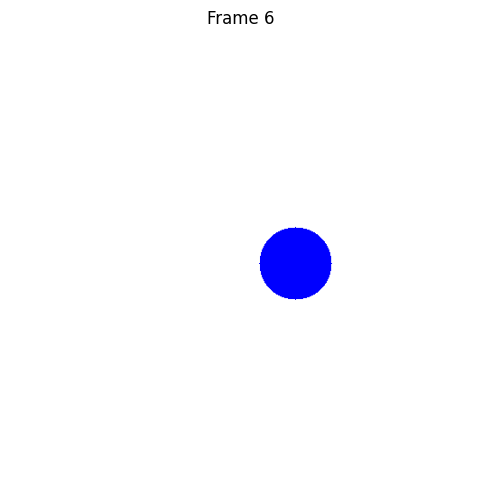

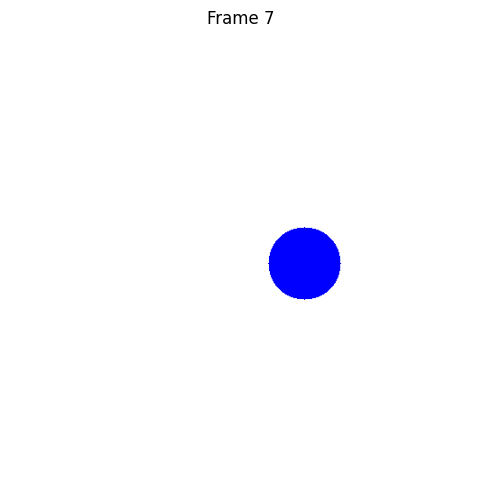

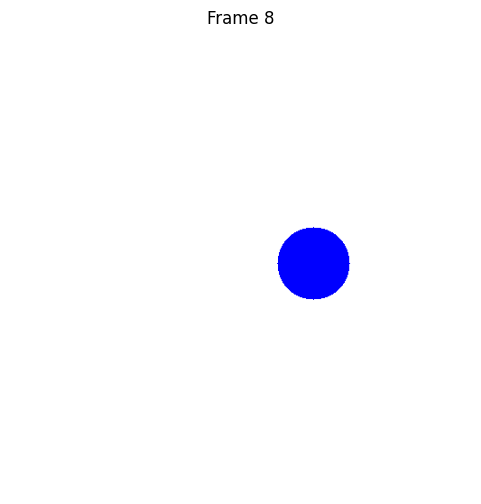

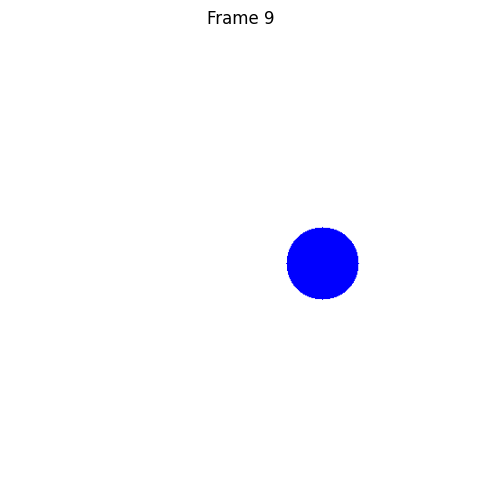

In [4]:
# (Assignment 2) Simple animation example: moving the center of a circle
# In Colab, real-time animation is tricky, so we generate multiple images in a loop,
# and then display them one after another.

frames = []  # List to store generated images

for i in range(0, 100, 10):
    img = np.full((512, 512, 3), 255, np.uint8)
    center = (256 + i, 256)  # Move the circle's center horizontally
    cv2.circle(img, center, 40, (255, 0, 0), -1)
    frames.append(img)

# Display each frame using Matplotlib
for idx, frame in enumerate(frames):
    show_image(f"Frame {idx}", frame)

# 과제 3. ROI(Region of Interest) 내부만 도형 그리기
- 이미지 일부 영역만 선택(슬라이싱)해서 그 영역에만 도형을 그릴 수 있습니다.
- 예: 100×100 영역을 잘라 그 영역 내부에 사각형을 그린 뒤, 다시 원본 이미지에 붙이는 방식.

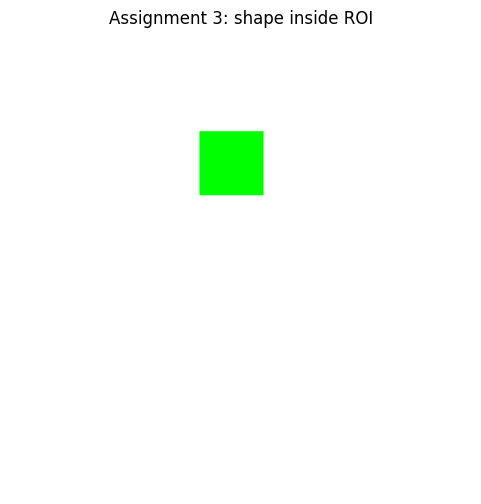

In [5]:
# (Assignment 3) Drawing shapes only inside the ROI
image_3 = np.full((512, 512, 3), 255, np.uint8)

# Define ROI: y: 100~200, x: 200~300
y1, y2 = 100, 200
x1, x2 = 200, 300

roi = image_3[y1:y2, x1:x2]  # extract ROI

# Draw a rectangle inside the ROI
cv2.rectangle(
    roi,
    (10, 10),
    (80, 80),
    (0, 255, 0),  # green
    -1            # filled
)

# Put the modified ROI back
image_3[y1:y2, x1:x2] = roi

show_image("Assignment 3: shape inside ROI", image_3)

# 과제 4. `cv2.line`의 `lineType` 변경
- OpenCV에서 제공하는 **lineType**은 크게 `cv2.LINE_4`, `cv2.LINE_8`, `cv2.LINE_AA` 등이 있습니다.
- **Aliased** vs **Anti-Aliased**(LINE_AA) 차이를 확인할 수 있습니다.


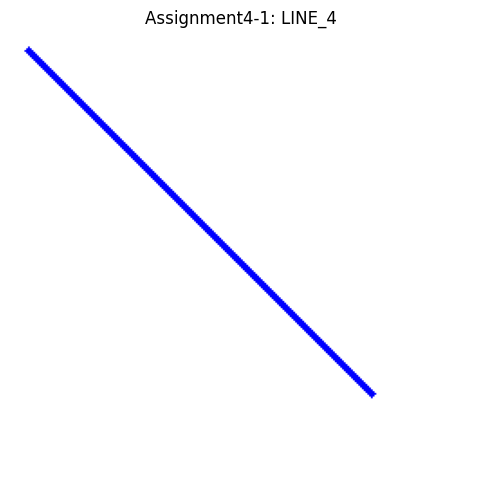

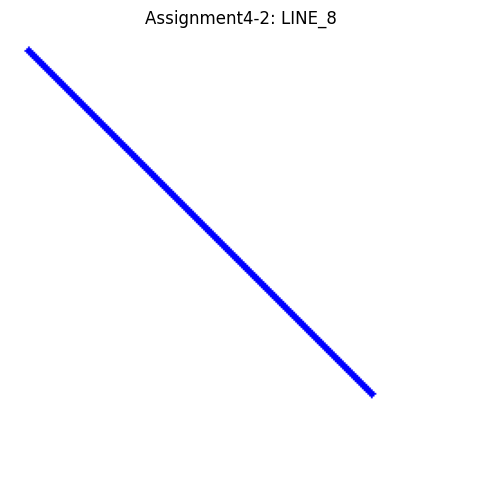

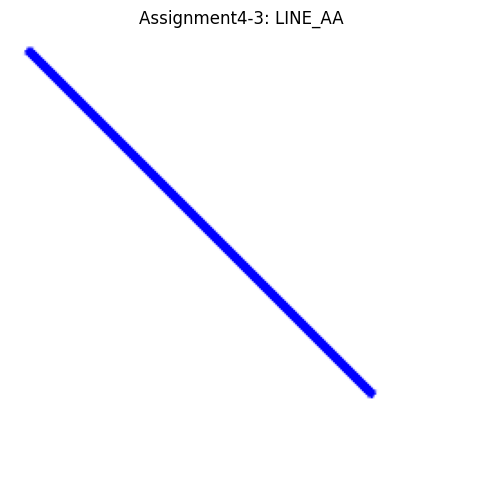

In [6]:
# (Assignment 4) lineType comparison
image_4_1 = np.full((256, 256, 3), 255, np.uint8)
image_4_2 = np.full((256, 256, 3), 255, np.uint8)
image_4_3 = np.full((256, 256, 3), 255, np.uint8)

# Draw lines with different lineTypes
cv2.line(image_4_1, (10, 10), (200, 200), (255, 0, 0), 3, lineType=cv2.LINE_4)
cv2.line(image_4_2, (10, 10), (200, 200), (255, 0, 0), 3, lineType=cv2.LINE_8)
cv2.line(image_4_3, (10, 10), (200, 200), (255, 0, 0), 3, lineType=cv2.LINE_AA)

show_image("Assignment4-1: LINE_4", image_4_1)
show_image("Assignment4-2: LINE_8", image_4_2)
show_image("Assignment4-3: LINE_AA", image_4_3)

# 과제 5. 투명도(알파 채널) 다루기 (고급)
- OpenCV는 기본적으로 BGR 3채널 이미지를 다룹니다.
- **4채널(RGBA) 이미지**를 사용하려면 별도의 옵션이나 배열 조작이 필요합니다.
- 아래는 간단히 **4채널** 이미지(배경 투명) 위에 도형을 그리는 예시입니다.
  - Matplotlib에서 RGBA 이미지를 표시하려면 변환 과정이 조금 다릅니다.

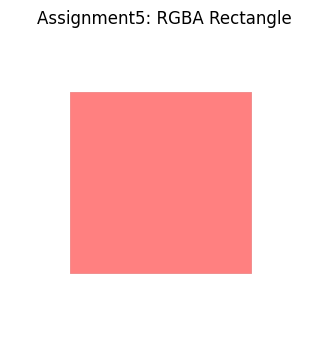

In [9]:
# (Assignment 5) Drawing on a 4-channel (transparency) image
image_5 = np.zeros((256, 256, 4), np.uint8)  # RGBA

# R=255, G=0, B=0, A=127 (semi-transparent red)
cv2.rectangle(image_5, (50, 50), (200, 200), (255, 0, 0, 127), -1)

# Display RGBA image in Matplotlib directly
plt.figure(figsize=(4,4))
plt.imshow(image_5)
plt.title("Assignment5: RGBA Rectangle")
plt.axis('off')
plt.show()

# Note: In real scenarios, OpenCV may ignore alpha unless special handling or blending is used.